In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings

In [ ]:
call_df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Megaline/data/megaline_calls.csv")
net_df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Megaline/data/megaline_internet.csv")
msg_df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Megaline/data/megaline_messages.csv")
plan_df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Megaline/data/megaline_plans.csv")
user_df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Megaline/data/megaline_users1.csv")

# Overview and analysis of users

In [ ]:
print(user_df.shape)
user_df.head()

(500, 8)


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
user_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

In [ ]:
# Parsing the state and city for grouping comparisons
address = user_df['city'].str.rsplit(" ", 2, expand=True)
user_df['state'] = address[1]
user_df['address'] = address[0]

#- Churner Count
#- Average Time Before Churn
#- Registration vs Churn Month
#- Churn by State
#- Churn by Region
#- Churn By Age


In [ ]:
# Converting to datetime 
user_df['reg_date'] = pd.to_datetime(user_df['reg_date'],yearfirst=True)
user_df['churn_date'] = pd.to_datetime(user_df['churn_date'],yearfirst=True)

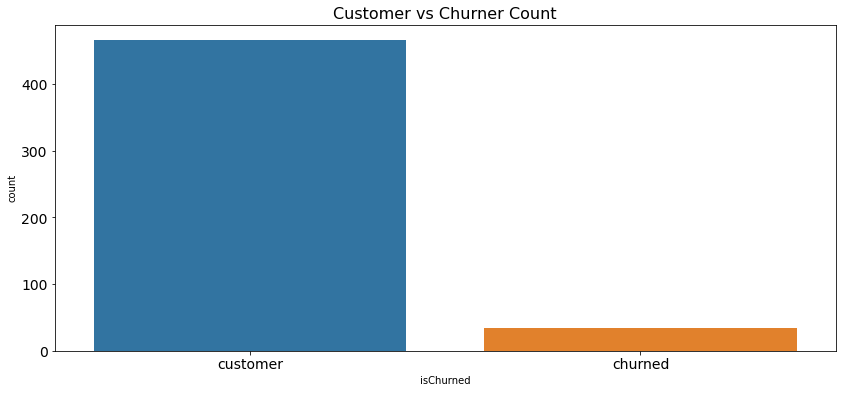

In [ ]:
# np.where(condition, value if condition is true, value if condition is false)
user_df['isChurned'] = np.where(user_df['churn_date'].isna(), 0, 1)

viz = sns.countplot(x=user_df['isChurned'])
viz.figure.set_size_inches(14,6)
viz.set_title("Customer vs Churner Count", fontsize=16)
viz.set_xticklabels(['customer', 'churned'], size = 14)
viz.set_yticklabels(range(0,500,100), size = 14);

####
AVERAGE TIME BEFORE CHURN: 141.65 DAYS
####


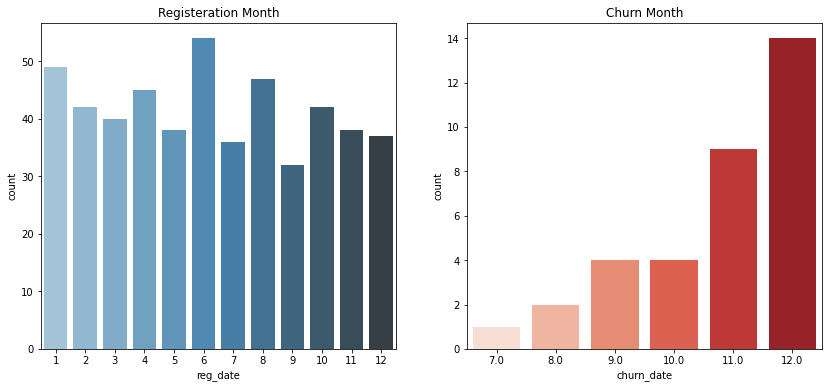

In [ ]:
user_df['days_on_policy'] = (user_df['churn_date'] - user_df['reg_date']).astype(str).str.split(" ", expand=True)[0].replace('NaT', np.nan).astype(float)
churn_avg_days = round(user_df['days_on_policy'].mean(), 2)
print("####")
print("AVERAGE TIME BEFORE CHURN:", churn_avg_days,'DAYS')
print("####")



reg_month = user_df['reg_date'].dt.month
churn_month = user_df['churn_date'].dt.month


fig, ax = plt.subplots(1, 2)
sns.countplot(x=reg_month, ax = ax[0], palette='Blues_d')
sns.countplot(x=churn_month, ax = ax[1], palette='Reds')
ax[0].figure.set_size_inches(14,6)
ax[0].set_title("Registeration Month")
ax[1].set_title("Churn Month")
plt.show()

# Take Away
#### June, January, August the highest sign on month and December highest churn month with 141 days ties those to months together as key 
- People are waiting for new year sales to purchase new plans
- What event is happening in the summer months and why is July so low?
- Are their new plans released or new phones being bought christmas that need new sims


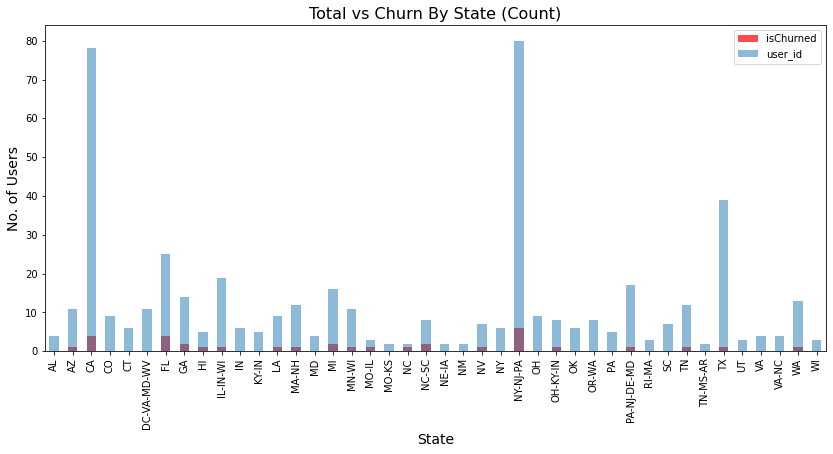

In [ ]:
# Plotting the total number of plans against the number of churns
churn_by_state = user_df.groupby('state')['isChurned'].sum()
total_by_state = user_df.groupby('state')['user_id'].count()

churn_by_state.plot(kind = 'bar', figsize=(14,6), color='red', alpha=.7)
total_by_state.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Total vs Churn By State (Count)", fontsize=16)
plt.legend();

In [ ]:
# The following is a count of user in states /tri-state areas which have no churners
print('###')
print('STATES WITH A ZERO CHURN RATE')
print('###')
total_by_state.sort_values()[:23]

###
STATES WITH A ZERO CHURN RATE
###


state
TN-MS-AR    2
NM          2
NE-IA       2
NC          2
MO-KS       2
WI          3
UT          3
RI-MA       3
MO-IL       3
VA-NC       4
VA          4
MD          4
AL          4
KY-IN       5
PA          5
HI          5
CT          6
IN          6
OK          6
NY          6
SC          7
NV          7
OH-KY-IN    8
Name: user_id, dtype: int64

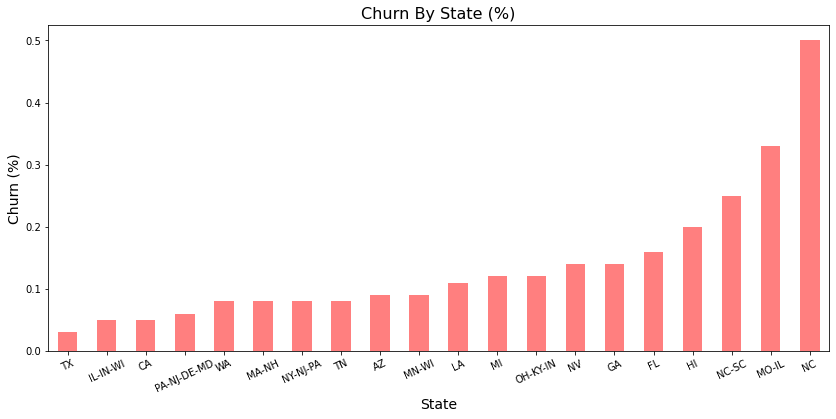

In [ ]:
churn_by_state_perc = (churn_by_state / total_by_state).round(2).sort_values()

churn_by_state_perc[22:].plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)
plt.xticks(rotation=25)
plt.ylabel('Churn (%)', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Churn By State (%)", fontsize=16);

In [ ]:
region_dict = {}

region_dict['northeast'] = ['NY-NJ-PA', "PA-NJ-DE-MD", 'NY', 'CT', 'MA-NH',"RI-MA", 'DC-VA-MD-WV', 'PA', 'MD']   
region_dict['midwest'] = ['OH', 'OK', 'MI', 'IL-IN-WI', 'MO-IL', 'NE-IA', 'MO-KS', 'MN-WI', 'WI', 'UT']
region_dict['southeast'] = ['TX','NC-SC', 'NC-VA', 'GA', 'FL', 'TN', 'KY-IN', 'TN-MS-AR', 'LA', 'IN', 'VA-NC', 'AL', 'NC', 'OH-KY-IN', 'SC', 'VA']
region_dict['pacific'] = ['CA', 'NV', 'OR', 'WA', 'HI', 'OR-WA']
region_dict['intermountain'] = ['NM', 'CO', 'AZ']

In [ ]:
# states = list(user_df['State'].unique())


# new_states = []
# for k, v in region_dict.items():
#   for el in v:
#     new_states.append(el)

# (set(new_states) | set(states)) - (set(new_states) & set(states))

In [ ]:
region_list=[]
for row in user_df['state']:
  for k, v in region_dict.items():
    for el in v:
      if el == row:
        region_list.append(k)

user_df['region'] = region_list

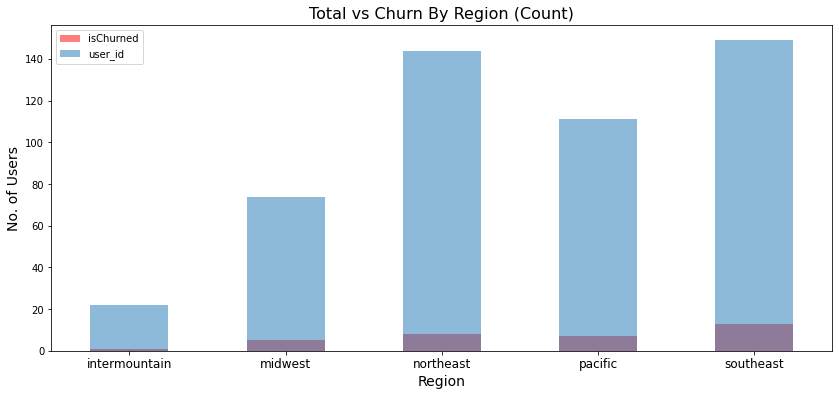

In [ ]:
# Plotting the total number of plans against the number of churns
churn_by_region = user_df.groupby('region')['isChurned'].sum()
total_by_region = user_df.groupby('region')['user_id'].count()

churn_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5, color='red')
total_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=0, fontsize=12)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("Region", fontsize=14)
plt.title("Total vs Churn By Region (Count)", fontsize=16)
plt.legend();

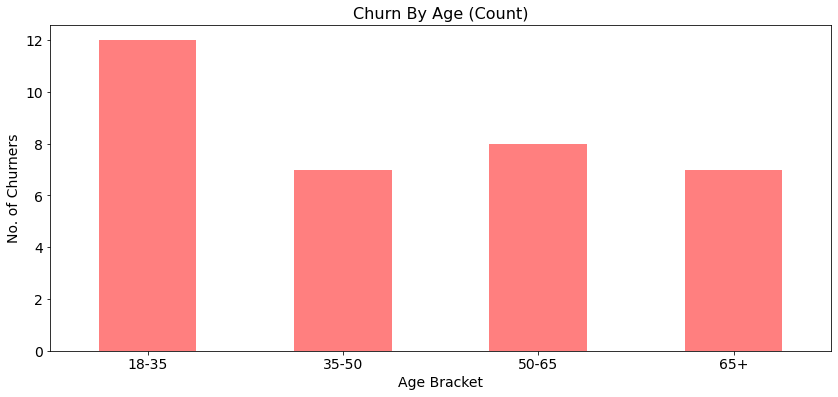

In [ ]:
# Plotting the total number of churners by age bracket
# churn_by_age = user_user_user_df.groupby('age')['isChurned'].sum()
user_df['age_bracket'] = pd.cut(user_df['age'], bins=[0, 35, 50, 65, 100], labels=['18-35', '35-50', '50-65', '65+'])


churn_by_age = user_df.groupby('age_bracket')['isChurned'].sum()


churn_by_age.plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Churners', fontsize=14)
plt.xlabel("Age Bracket", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks( fontsize=14)
plt.title("Churn By Age (Count)", fontsize=16);

# Stage 1: Take Aways
- Certain southern states seem to have a higher 

# Stage 2: Usage Statistics
- The monthly mean, Std Dev, and variance
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- Round up mins and mb's
- The monthly revenue from each user 

In [ ]:
# All user_ids and corresponding plan category 
user_plan_dict = dict(zip(user_df['user_id'], user_df['tariff']))
user_state_dict = dict(zip(user_df['user_id'], user_df['state']))
user_region_dict = dict(zip(user_df['user_id'], user_df['region']))
# List of month names for indexing purposes
months = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
def monthly_usage(df, date_col, agg_val, agg_func):
    df['month'] = pd.to_datetime(df[date_col]).dt.month
    pivot = df.pivot_table(index='user_id', values=agg_val, columns='month', aggfunc=agg_func, fill_value=0)
    pivot['monthly_avg_count'] = round((pivot[months].sum(axis=1) / 12),2)
    # Map plan category with all user_ids in (msg/call/net) pivot tables
    pivot['plan_category'] = pivot.index.map(user_plan_dict)
    pivot['plan_base_price'] = pivot['plan_category'].replace({'surf':50, 'ultimate':70})
    pivot['state'] = pivot.index.map(user_state_dict)
    pivot['region'] = pivot.index.map(user_region_dict)
    return pivot


msg_count = monthly_usage(msg_df, 'message_date', 'message_date', 'count')
call_count = monthly_usage(call_df, 'call_date', 'duration', 'count')
min_count = monthly_usage(call_df, 'call_date', 'duration', 'sum')
net_count = monthly_usage(net_df, 'session_date', 'mb_used', 'sum')

In [ ]:
net_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47,158.46,ultimate,70,GA,southeast
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18,6703.16,surf,50,WA,pacific
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24,3357.78,surf,50,NV,pacific
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14,2253.68,surf,50,OK,midwest
1004,0.0,0.0,0.0,0.0,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29,13029.40,surf,50,WA,pacific


# Overall Monthly Usage: Descriptive Statistics

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
for p, t in zip(pivots, titles):
  print(f"Monthly {t} Average:", round(p['monthly_avg_count'].mean(), 2))
  print(f"Monthly {t} Std Deviation:", round(p['monthly_avg_count'].std(), 2))
  print(f"Monthly {t} Variance:", round(p['monthly_avg_count'].var(), 2),'\n\n')

Monthly Msgs Average: 15.77
Monthly Msgs Std Deviation: 16.02
Monthly Msgs Variance: 256.56 


Monthly Calls Average: 23.86
Monthly Calls Std Deviation: 19.85
Monthly Calls Variance: 393.97 


Monthly Mins Average: 160.98
Monthly Mins Std Deviation: 134.14
Monthly Mins Variance: 17993.99 


Monthly MBs Average: 6550.91
Monthly MBs Std Deviation: 5161.7
Monthly MBs Variance: 26643124.67 




#1. Does Plan Category Have An Effect On Customer Usage 
- Msgs, Calls, Mins, MBs 

#1(a). Analysis of Usage by Plan Category
- We can not reject the null hypothesis
- No clear statistically signifigant differences from this sample 
- Plan categories are imbalanced with 2:1 ratio of surf to ultimate users
- high p-value indicating a strong possibility that these distrubtions are by random chance
- All distribution are right skewed



#1(b). Notes on distribution attributes 
- Surf users overall send less text messages on average
- Surf users make slightly less calls overall
- More Ultimate users use 200 mins monthly while more Suff users use 400 mins on average
- Ultimate users tend to use higher amounts of data

# Per Month Usage by Plan Visualization 

In [ ]:
def catplot(df, monthly_column, title):
    viz = sns.catplot(data=df.drop(monthly_column, axis=1), col='plan_category')
    viz.set_xlabels(fontsize=14)
    viz.set_ylabels(fontsize=14)
    viz.fig.subplots_adjust(top=0.85)
    viz.fig.suptitle(f"{title} by Month/Plan", fontsize=16)
    plt.show()
    print('\n\n')

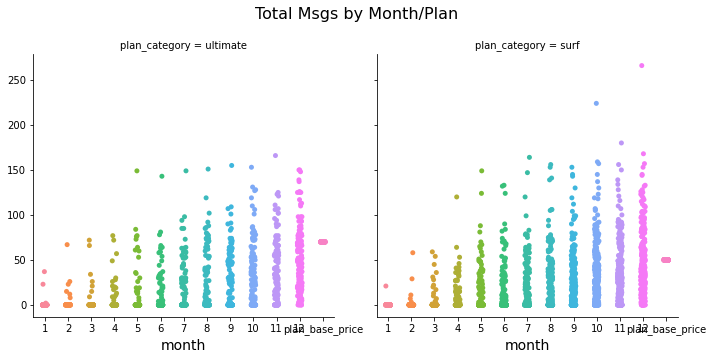

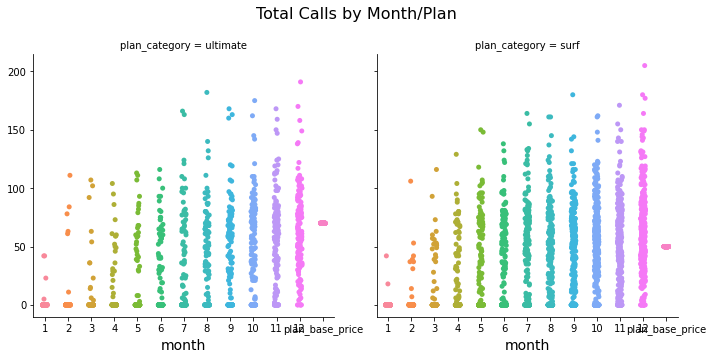

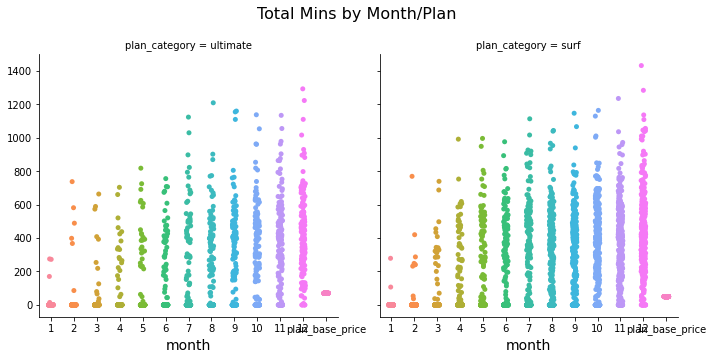

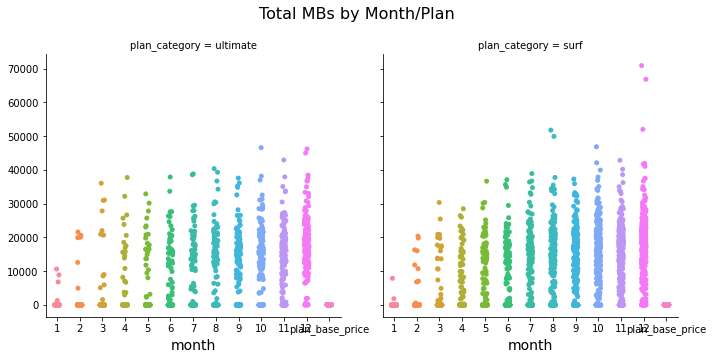

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Total Msgs', 'Total Calls', 'Total Mins', 'Total MBs']

for p, t in zip(pivots, titles):
  catplot(p.drop('plan_base_price', axis=1), 'monthly_avg_count', t)

# Distplot Of Average Monthly Usage Count (Greater Insight on Usage Density)

In [ ]:
def distplot(df, cat_col, title, hue):
  warnings.filterwarnings('ignore')

  groups = df[cat_col].unique()
  if len(groups) ==2:
    t, p =   stats.ttest_ind(df[df['plan_category'] == 'surf']['monthly_avg_count'], 
                          df[df['plan_category'] == 'ultimate']['monthly_avg_count'])
    textstr = f"Students Ttest\nT-stat: {t.round(3)}\np-value: {p.round(3)}"
  
  else:
    group_vals = []
    for g in groups:
      group_vals.append(df[df[cat_col] == g]['monthly_avg_count'])
      

    f, p = stats.f_oneway(*group_vals)
    textstr = f"One-Way ANOVA\nF-stat: {f.round(3)}\np-value: {p.round(3)}"

  for g in groups:
    print(f"Number of {g} Customers Who Used {title}: "+str(len(df[df[cat_col] == g]['monthly_avg_count'])))
    viz = sns.distplot(df[df[cat_col] == g]['monthly_avg_count'], fit_kws=dict(linewidth=2.5))

  viz.set_title(f"Average Monthly {title} by {hue}", fontsize=16)
  plt.legend(df[cat_col].unique())
  viz.figure.set_size_inches(12,6)
  viz.set_xlabel(viz.get_xlabel(), fontdict={'size': 14})
  viz.set_ylabel(viz.get_ylabel(), fontdict={'size': 14})
  plt.text(0.2, 0, textstr, fontdict={'size': 14})
  plt.show()
  print('\n\n')

Number of ultimate Customers Who Used Msgs: 132
Number of surf Customers Who Used Msgs: 270


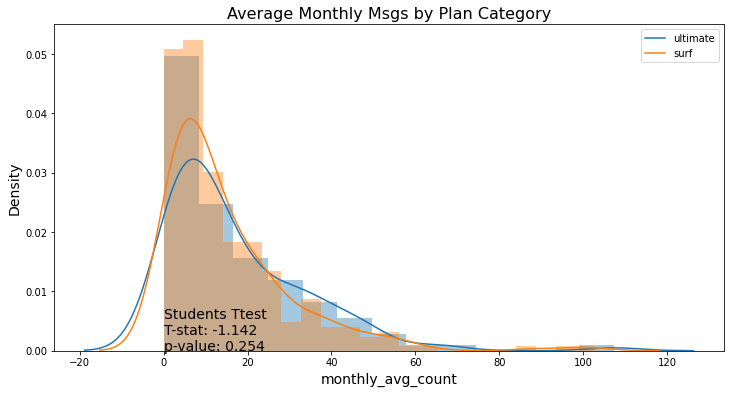




Number of ultimate Customers Who Used Calls: 155
Number of surf Customers Who Used Calls: 326


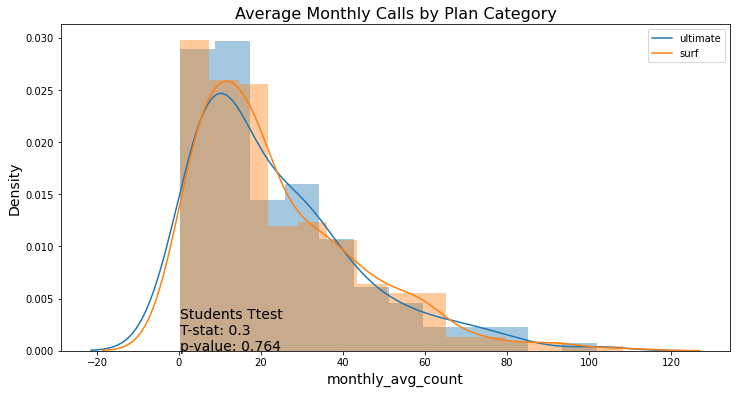




Number of ultimate Customers Who Used Mins: 155
Number of surf Customers Who Used Mins: 326


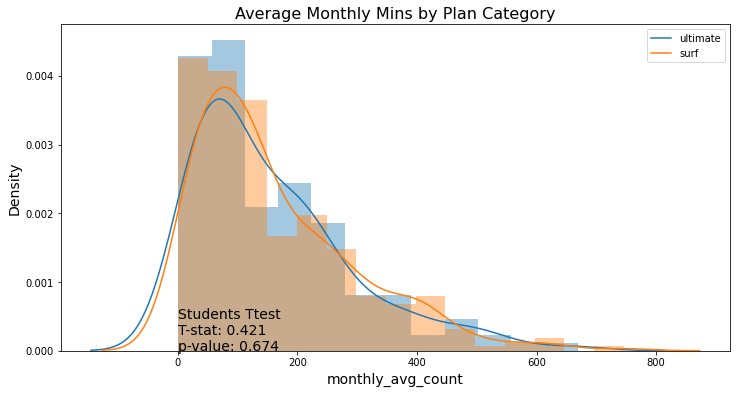




Number of ultimate Customers Who Used MBs: 157
Number of surf Customers Who Used MBs: 332


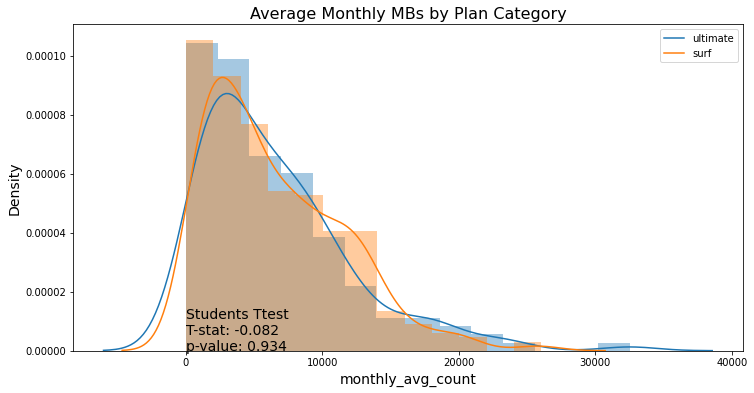

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'plan_category', t, 'Plan Category')

#2.  Does Customer Region Have An Effect On Customer Usage 
- Msgs, Calls, Mins, MBs 

#2(a). Analysis of Usage by Region
- We can not reject the null hypothesis
- No clear statistically signifigant differences from this sample 
- Categories are imbalanced with ratio of between 1:3 - 1:6 when compared to other regions
- Average messages between regions is extremely similar
- Cluster of Midwest users send 100 messages on average per month
- North-East and Mid-West users make the most calls
- Most South-East and Pacific users make fewer calls
- North-East and Inter-Mountain users use more monthly mb's on average 
- All distributions are right skewed

#1(b). Notes on distribution attributes 
- Call count and minutes distributions are closely aligned 
- Distributions also have clusters of users at the high edge (Pacific, Inter-Mountain)

Number of southeast Customers Who Used Msgs: 119
Number of pacific Customers Who Used Msgs: 91
Number of midwest Customers Who Used Msgs: 64
Number of northeast Customers Who Used Msgs: 111
Number of intermountain Customers Who Used Msgs: 17


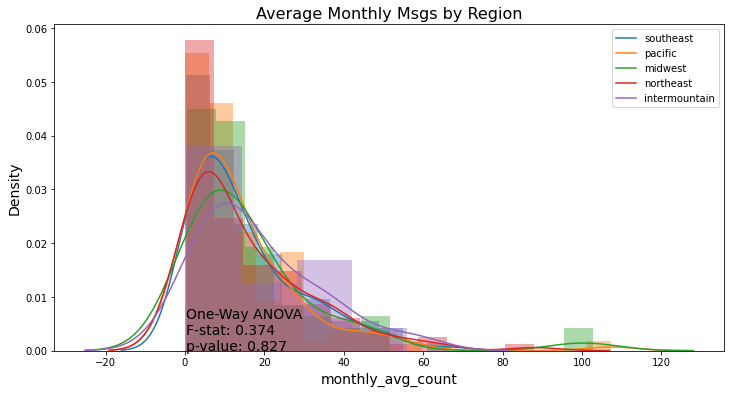




Number of southeast Customers Who Used Calls: 142
Number of pacific Customers Who Used Calls: 109
Number of midwest Customers Who Used Calls: 71
Number of northeast Customers Who Used Calls: 139
Number of intermountain Customers Who Used Calls: 20


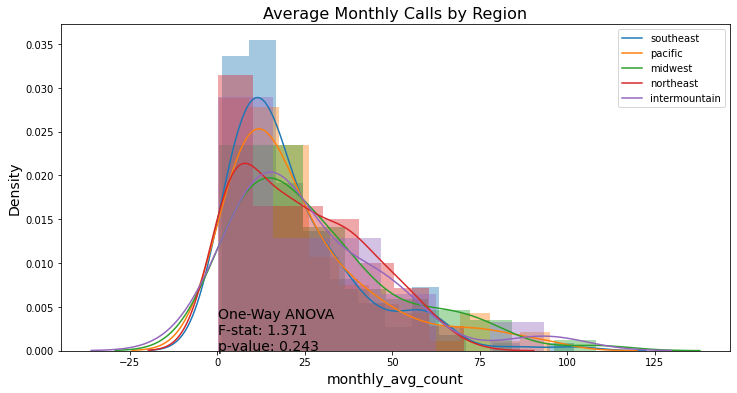




Number of southeast Customers Who Used Mins: 142
Number of pacific Customers Who Used Mins: 109
Number of midwest Customers Who Used Mins: 71
Number of northeast Customers Who Used Mins: 139
Number of intermountain Customers Who Used Mins: 20


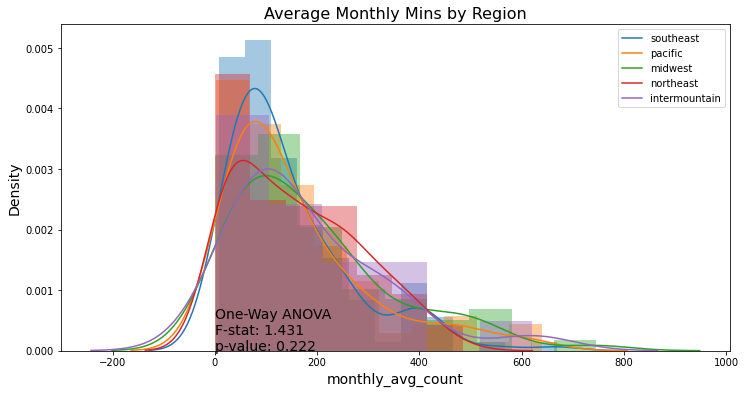




Number of southeast Customers Who Used MBs: 143
Number of pacific Customers Who Used MBs: 111
Number of midwest Customers Who Used MBs: 74
Number of northeast Customers Who Used MBs: 141
Number of intermountain Customers Who Used MBs: 20


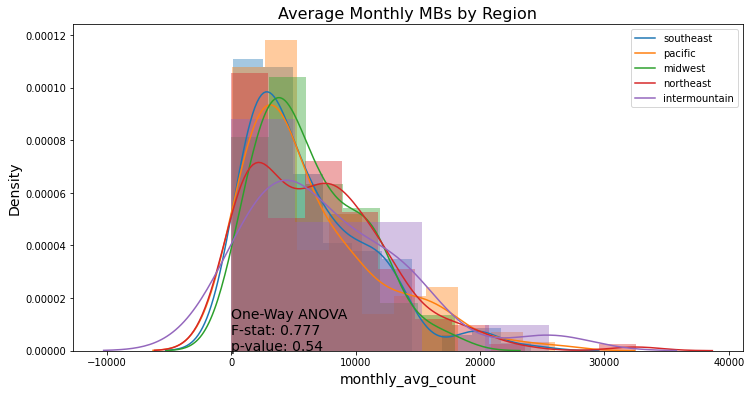

In [ ]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'region', t, 'Region')

# Does the revenue of users from NY-NJ differ from other regions?
- Null Hypothesis - There is no relationship between region and average revenue
- Distplot and Student T-test metric to compare NY-NJ average revenue against all other regions

# Function To Convert Usage Counts to Usage Cost 
- Deduct Pan Loimit from monthly usage
- Multiply remainder usage count by plan excess charge
- 



In [ ]:
def calc_extra_cost(pivot, surf_lim, ultim_lim, surf_excharge, 
                    ultim_excharge, excharge_col):

  # If call minutes then round up to the next minute
  if str(pivot) == 'min_count':
    pivot[months] = np.ceil(pivot[months])
  
  # If megabytes round up to the next thousand
  if str(pivot) == 'net_count':
    pivot[months] = pivot[months].apply(lambda x: np.ceil(x.astype(int) / 1000) * 1000)

  
  numerics = pivot.select_dtypes(include=['int', 'float'])
  objects = pivot.select_dtypes(include=['object'])

  numerics['plan_base_limit'] = numerics['plan_base_price'].replace({50:surf_lim, 70:ultim_lim})
  numerics[excharge_col] = numerics['plan_base_limit'].replace({surf_lim:surf_excharge, ultim_lim:ultim_excharge})

  # Subracting the monthly limit from the total monthly usage and replacing negative values with 0
  numerics[months] = numerics[months].subtract(numerics['plan_base_limit'], axis=0)
  numerics[numerics[months] < 0] = 0

  # Summing the total amount of usage over the limit and its total cost into columns)
  numerics[months] = numerics[months].mul(numerics[excharge_col], axis=0).round(2)

  numerics['total_excess_cost'] = round(numerics[months].sum(axis=1), 2) 
  numerics['monthly_avg_cost'] =   round(numerics['total_excess_cost'] / 12, 2)

  # Removing columns used for calulting monthly costs
  numerics = numerics.drop(['plan_base_price', 'monthly_avg_count', 'plan_base_limit', excharge_col], axis=1)
  pivot = pd.concat([numerics, objects],axis=1)

  return pivot

In [ ]:
# df, date_col, agg_val, agg_func, surf_lim, ultim_lim, surf_charge, unlim_charge, extra_charge_col, extra_count_col, total_extra
msg_charges = calc_extra_cost(msg_count, 50, 1000, 0.03, 0.01, 'extra_msg_charge')
call_charges = calc_extra_cost(min_count, 500, 3000, 0.03, 0.01, 'extra_min_charge')
mb_charges= calc_extra_cost(net_count, 15000, 30000, 0.01, 0.007, 'extra_mb_charge')

In [ ]:
msg_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.09,0.01,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,WA,pacific


In [ ]:
call_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.23,16.23,1.35,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,WA,pacific


In [ ]:
mb_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,73.3,35.04,43.69,152.03,12.67,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,43.45,0.00,43.45,3.62,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,120.44,120.44,10.04,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,56.73,95.17,129.82,38.53,0.0,68.51,63.89,452.65,37.72,surf,WA,pacific


# Distribution of excess charges by month
- Surf users tend to pay more across all three metrics
- Positive linear relationship between excess usage and months across all categories
- Surf users pay `$1` to `$4` extra for excess messages 
- Surf users pay `$5` to `$15` extra for excess minutes
- Ultimate usera pay  `$25` to `$100` for excess MBs, though surf users usually pay 2 or 3x more up to `$500`

- Increase in outliers among surf user excess minute during months 2, 3, 4, 5, 6


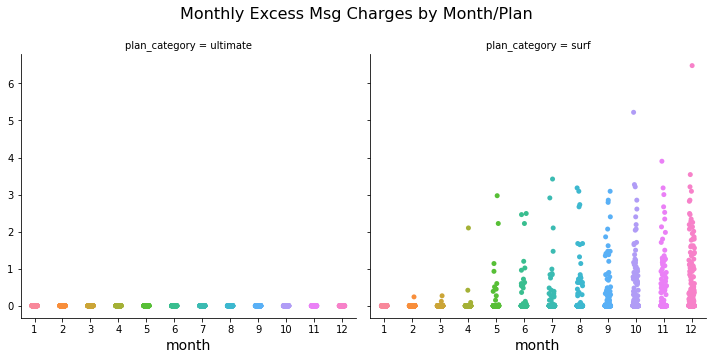

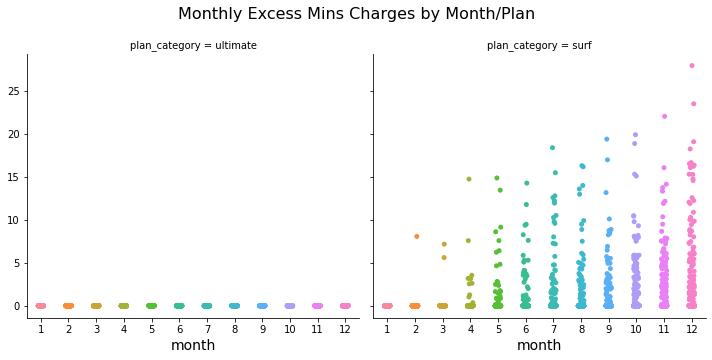

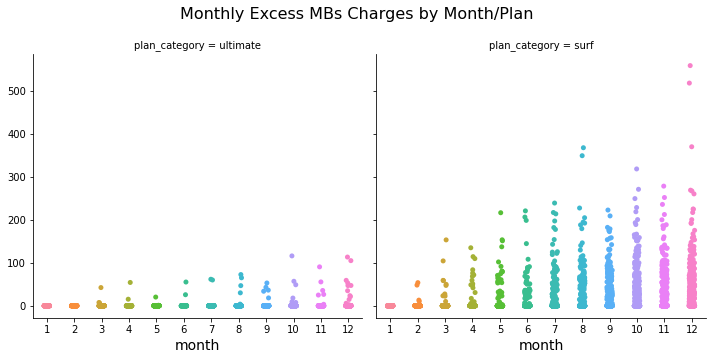

In [ ]:
pivots = [msg_charges, call_charges, mb_charges]
titles = ['Monthly Excess Msg Charges', 'Monthly Excess Mins Charges', 'Monthly Excess MBs Charges']

for p, t in zip(pivots, titles):
  catplot(p.drop("monthly_avg_cost", axis=1), 'total_excess_cost', t)

# Creating a total charges data frame 
- Total per month 
- Monthly Average

In [ ]:
total_charges = mb_charges[months].add(call_charges[months], axis=0, fill_value=0).add(msg_charges[months], axis=0, fill_value=0)
total_charges['plan_category'] = total_charges.index.map(user_plan_dict)
total_charges['plan_base_price'] = total_charges['plan_category'].replace({"surf":50, 'ultimate':70})
total_charges[months] = total_charges[months].add(total_charges['plan_base_price'], axis=0)
total_charges['monthly_avg_charges'] = round(total_charges.sum(axis=1) / 12, 2)

total_charges['state'] = total_charges.index.map(user_state_dict)
total_charges['region'] = total_charges.index.map(user_region_dict)


total_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,plan_category,plan_base_price,monthly_avg_charges,state,region
user_id,,,,,,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.00,70.00,70.00,70.00,70.00,70.00,70.00,ultimate,70,75.83,GA,southeast
1001,50.0,50.0,50.0,50.0,50.0,50.00,50.00,50.00,50.00,123.39,85.04,93.69,surf,50,66.84,WA,pacific
1002,50.0,50.0,50.0,50.0,50.0,50.00,50.00,50.00,50.00,50.00,93.45,50.00,surf,50,57.79,NV,pacific
1003,50.0,50.0,50.0,50.0,50.0,50.00,50.00,50.00,50.00,50.00,50.00,186.67,surf,50,65.56,OK,midwest
1004,50.0,50.0,50.0,50.0,50.0,106.73,145.17,179.82,88.53,50.00,118.51,113.89,surf,50,91.89,WA,pacific


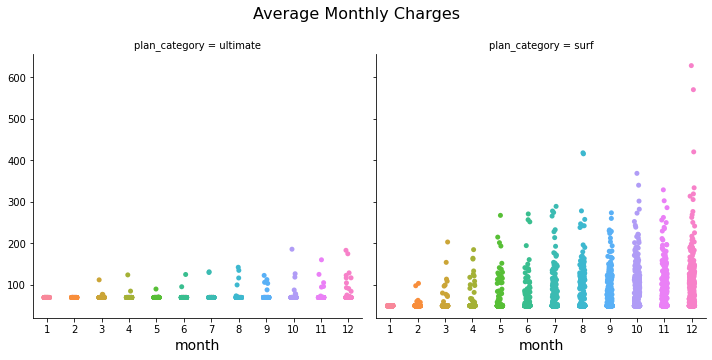

In [ ]:
  viz = sns.catplot(data=total_charges.iloc[:,:13], col='plan_category')
  viz.set_xlabels(fontsize=14)
  viz.set_ylabels(fontsize=14)
  viz.fig.subplots_adjust(top=0.85)
  viz.fig.suptitle(f"Average Monthly Charges", fontsize=16)
  plt.show()

- While usage generally aligns between surf and ultimate users the average monthly cost for surf users is 3-5 times higher than ultimate users due to excess charges

# Average Cost by Plan

In [ ]:
print('Average Mothly Surf Charge: $'+str(round(sum(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges']) / len(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges']),2)))
print('Average Monthly Ultimate Charge: $'+str(round(sum(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges']) / len(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges']),2)))

Average Mothly Surf Charge: $70.02
Average Monthly Ultimate Charge: $76.78


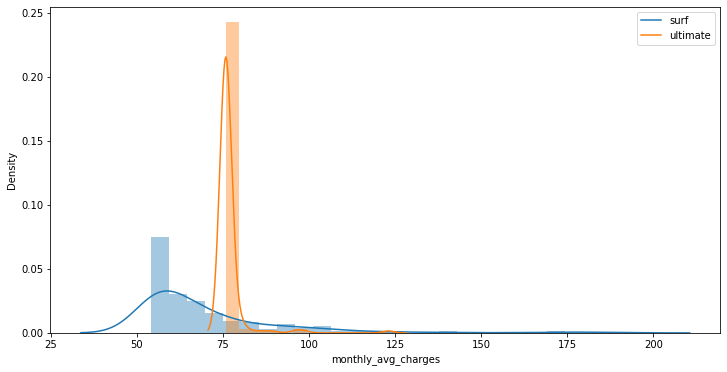

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges'])
plt.legend(['surf', 'ultimate'])

# Does the average revenue from users in NY-NJ area differ from other areas
# Two Tailed Hypothesis Test
- There is evidence to suggest a low effect size relationship between NY-NJ monthly charges when compred against HI, KY-IN, MN-WI, LA, and NE-IA 
- P-Value ~0.1 indicating statisical significance
- Small sample size may bias effect size


In [ ]:
NYNJ = total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges']
states = total_charges[total_charges['state'] != 'NY-NJ-PA']['state'].unique()



data = []
for state in states:
  state_2_count = len(total_charges[total_charges['state'] == state]['monthly_avg_charges'])
  t, p = stats.ttest_ind(NYNJ, total_charges[total_charges['state'] == state]['monthly_avg_charges'])
  data.append(['NY-NJ-PA', state, state_2_count, t.round(2), p.round(2)])

ttest_df = pd.DataFrame(data, columns=['State_1','State_2', 'State_2_Count','T-Stat', 'P-Value'])
ttest_df = ttest_df.sort_values(by='P-Value', ascending=True)

ttest_df.head(10)  

,State_1,State_2,State_2_Count,T-Stat,P-Value
30,NY-NJ-PA,HI,5,-1.66,0.10
27,NY-NJ-PA,KY-IN,4,-1.67,0.10
38,NY-NJ-PA,MN-WI,11,-1.56,0.12
32,NY-NJ-PA,LA,8,-1.54,0.13
14,NY-NJ-PA,NE-IA,2,1.52,0.13
40,NY-NJ-PA,NC,2,1.27,0.21
20,NY-NJ-PA,MA-NH,11,-1.11,0.27
31,NY-NJ-PA,CT,6,-1.03,0.30
34,NY-NJ-PA,MD,4,0.90,0.37
9,NY-NJ-PA,IL-IN-WI,19,0.86,0.39


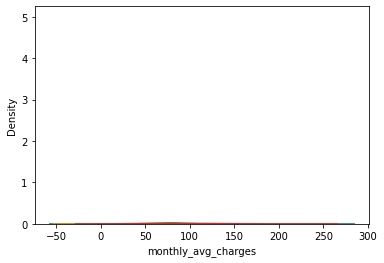

In [ ]:
for state in list(ttest_df['State_2'].unique())[:5]:
  sns.distplot(total_charges[total_charges['state'] == state]['monthly_avg_charges'], bins=5)

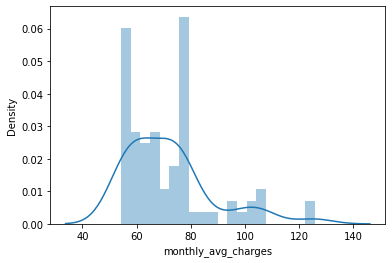

In [ ]:
sns.distplot(NYNJ, bins=20)

In [ ]:
independent_ttest(NYNJ, total_charges[total_charges['state'] == 'HI']['monthly_avg_charges'], 0.05)

(-0.6497395405684199, 82, 83.64485362695147, 2.0)

# Two Tailed Hypothesis Test
- There is evidence to suggest a low effect size relationship between NY-NJ monthly charges when compred against HI, KY-IN, MN-WI, LA, and NE-IA 
- P-Value ~0.1 indicating statisical significance
- Small sample size may bias effect size


In [ ]:
len(total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges'])

79

# Average Cost by Existing/Churned Customer

In [ ]:
churned_dict = dict(zip(user_df['user_id'], user_df['isChurned']))
total_charges['isChurned'] = total_charges.index.map(churned_dict)

print('Average Monthly Charge Existing Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']),2)))
print('Average Monthly Charge Churned Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']),2)))

Average Monthly Charge Existing Customer: $72.24
Average Monthly Charge Churned Customer: $71.34


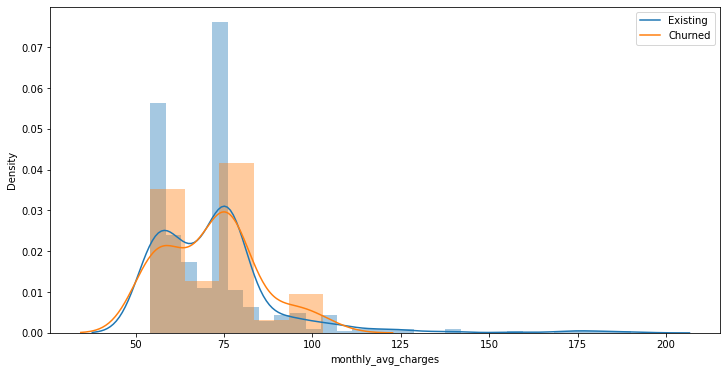

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges'])
plt.legend(['Existing', 'Churned'])

- Surf users tend to have higher average monthly charges